oleh : Karyadi, Kelas Big Data A Universitas Gajah Mada

# Pendahuluan

Pada kesempatan ini, saya mencoba mengeksplorasi dataset salary. Data ini bisa dibilang merupakan data sensus penduduk dengan responden sebanyak 13566 orang yang berasal dari berbagai macam kalangan. Data ini memiliki variabel/nama kolom sebagai berikut:

1. age : berisikan informasi umur responden, kontinu

2. workclass : berisikan informasi kelas pekerjaan responden. Kategorinya : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. fnlwgt : kontinu

4. education : berisikan informasi tingkat pendidikan responden. Kategorinya : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. education-num : berisikan informasi lama waktu belajar responden, kontinu

6. martial-status : berisikan informasi status perkawinan responden. Kategorinya : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. occupation : berisikan informasi pekerjaan responden. Kategorinya : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. relationship : berisikan informasi peranan responden di keluarga. Kategorinya : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. race : berisikan informasi ras responden. Kategorinya : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. sex : berisikan informasi jenis kelamin responden. Kategorinya Female, Male.

11. capital-gain : berisikan informasi keuntungan dalam bentuk uang yang dimiliki responden, kontinu.

12. capital-loss : berisikan informasi kerugian dalam bentuk uang yang dimiliki responden, kontinu.

13. hours-per-week : berisikan informasi lama waktu kerja responden dalam jam selama satu minggu, kontinu.

14. native-country : berisikan informasi negara asal responden. Kategorinya : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15. salary : berisikan informasi besar pendapatan responden selama satu tahun. Kategorinya : <=50K, >50K

Apabila anda tertarik untuk mengeksplorasi dataset ini, silahkan mengunjungi https://archive.ics.uci.edu/ml/datasets/Adult

# Import dataset

In [1]:
#import module python yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#import dataset ke dalam python
data_salary=pd.read_excel('salary_dataset.xlsx')

In [53]:
#menampilkan tabel
data_salary.head(7)

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K


In [4]:
#menampilkan ukuran tabel
data_salary.shape

(13566, 15)

In [7]:
#menghitung data null
data_salary.isnull().sum()

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
martial-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
salary            1
dtype: int64

Pada tabel diatas terdapat data kosong sejumlah 1 buah. Berhubung tidak banyak, dan akan merepotkan jika harus mengisinya, kita bisa langsung membuangnya dengan perintah dropna(). Pada bagian ini seperti tidak ada data kosongnya. Namun saya sekilas menemukan beberapa data yang berisi '?'. Saat ini memang tidak terlihat, nanti akan terlihat jelas apabila telah divisualisasikan. Untuk data kategori, tidak akan saya ganti. Pada kesempatan ini, data data ini tidak akan saya hapus, terlebih jika jumlahnya banyak. Saya biarkan saja. 

In [8]:
#menampilkan data setelah data kosongnya dibuang
data_salary.dropna().count()

age               13565
workclass         13565
fnlwgt            13565
education         13565
education-num     13565
martial-status    13565
occupation        13565
relationship      13565
race              13565
sex               13565
capital-gain      13565
capital-loss      13565
hours-per-week    13565
native-country    13565
salary            13565
dtype: int64

In [9]:
#menampilkan statistik deskriptif data numberik
data_salary.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,13566.000000,1.356500e+04,13565.000000,13565.000000,13565.000000,13565.000000
mean,38.500442,1.901095e+05,10.088463,1068.408478,88.224032,40.479690
std,13.619443,1.051031e+05,2.551213,7364.626741,402.771201,12.249446
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.184620e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785510e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379430e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


Melalui tabel di atas, kita dapat melihat pesebaran data numerik dari tabel data_salary. Rata rata umur responden ialah 38.50 tahun dengan minimal 17 tahun, maksimal 90 tahun. Untuk standar deviasinya 13.62. Sedangkan untuk lama pendidikan responden, rata ratanya ialah 10.09 tahun dengan minimal 1 tahun, maksimal 16 tahun. Untuk standar deviasinya 13.62. Selanjutnya untuk lama jam kerja responden per minggu, rata ratanya ialah 40.48 jam dengan minimal 1 jam, maksimal 99 jam. Untuk standar deviasinya 12.25.

Apabila diperhatikan, kolom capital-gain dan capital-loss memiliki banyak data bernilai 0. Nilai minimal, Q1, Q2, dan Q3 kedua kolom ini isinya 0. Artinya hingga 3/4 bagian dari jumlah data yang ada nilainya 0. Oleh karenanya, saya tidak akan memakai kedua kolom ini dalam analisis. Untuk kolom fnlwgt tidak saya bahas, sebab saya tidak paham dengan kolom ini.

# Karakteristik Responden

Pada bagian ini, saya hendak melihat persebaran responden untuk data numerik dan data kategori. Visualisasi yang saya gunakan ialah histogram, boxplot dan diagram pie. Histogram digunakan untuk data numerik, agar mudah melihat di mana data mengelompok. Untuk melihat ada tidaknya pencilan di data numerik digunakan boxplot. Sementara untuk data kategori diagram pie. Diagram pie ini untuk mempermudahkan melihat mayoritas data yang ada berdasarkan proporsinya. Agar tidak berulang ulang menulis program plot boxplot dan plot pie, saya menjadikannya fungsi.

In [72]:
def plot_boxplot(var):
    #memperoleh statistik deskriptive untuk mencari nilai jangkauan quartil
    data_salary[str(var)].describe()
    var_desc = data_salary[str(var)].describe()
    low_q = var_desc[4]
    high_q = var_desc[6]
    iqr = high_q - low_q

    # membuat box plot
    data_salary[str(var)].plot.box(figsize=(3.5,3.5))

    # mengecek nilai pencilan
    lower_threshold = low_q - iqr * 1.5
    higher_threshold = high_q + 1.5 * iqr

    data_outlier_negative = data_salary.loc[data_salary[str(var)] < lower_threshold]
    data_outlier_positive = data_salary.loc[data_salary[str(var)] > higher_threshold]

    print("Jumlah outlier negatif = " + str(data_outlier_negative.shape[0]))
    print("Jumlah outlier positif = " + str(data_outlier_positive.shape[0]))

In [78]:
#pembuatan fungsi diagram pie
def pie(nama_kolom):
    data= data_salary[str(nama_kolom)]
    
    plt.figure(figsize=(4,4))
    ax = data.value_counts()
    ax = ax.plot(kind='pie', legend=True, fontsize=14)

## Age

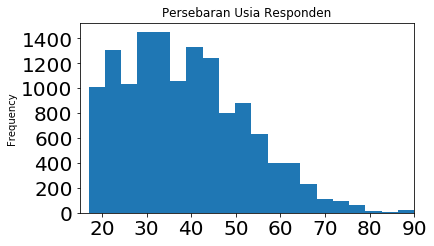

In [71]:
ax=data_salary['age'].plot(kind='hist',bins=20, figsize=(6,3.5), fontsize=20)
ax.set_title("Persebaran Usia Responden")
ax.set_xlim(15, 90)
plt.show()

Jumlah outlier negatif = 0
Jumlah outlier positif = 113


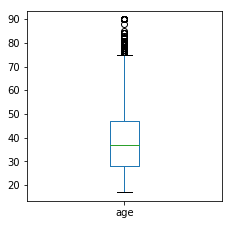

In [73]:
plot_boxplot('age')

Responden lebih banyak mengumpul usia 20-50 tahun. Rata rata usia responden ialah 38.5 dengan paling muda 17 tahun dan paling tua 90 tahun. Lebih jauh lagi, di variabel age terdapat 113 data yang menjadi pencilan atas.

## Education Num

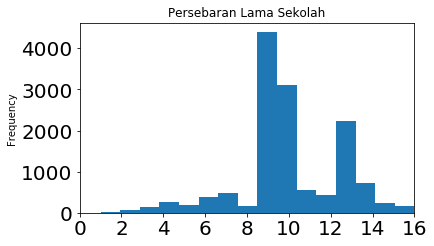

In [74]:
ax=data_salary['education-num'].plot(kind='hist',bins=16, figsize=(6,3.5),
                                     fontsize=20)
ax.set_title("Persebaran Lama Sekolah")
ax.set_xlim(0, 16)
plt.show()

Jumlah outlier negatif = 487
Jumlah outlier positif = 0


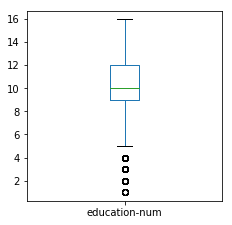

In [75]:
plot_boxplot('education-num')

Lama belajar responden lebih banyak mengumpul di 8-10 tahun. Rata rata lama belajar responden ialah 10.09 dengan lama belajar antara rentang 1-16 tahun. Lebih jauh lagi, di variabel education-num terdapat 487 data yang menjadi pencilan bawah.

## Hours per week

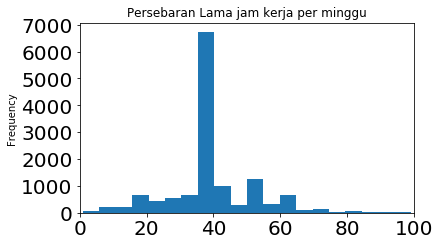

In [76]:
ax=data_salary['hours-per-week'].plot(kind='hist',bins=20, figsize=(6,3.5),
                                      fontsize=20)
ax.set_title("Persebaran Lama jam kerja per minggu")
ax.set_xlim(0, 100)
plt.show()

Jumlah outlier negatif = 2279
Jumlah outlier positif = 1472


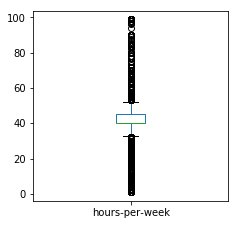

In [77]:
plot_boxplot('hours-per-week')

Lama jam kerja responden lebih banyak mengumpul di 40 jam per minggu. Rata rata responden bekerja selama 40.48 jam dengan paling sedikit 1 jam dan paling lama 99 jam. Lebih jauh lagi, di variabel hours-per-week terdapat 2279 data yang menjadi pencilan atas 1472 data yang menjadi pencilan bawah.

## Work Class

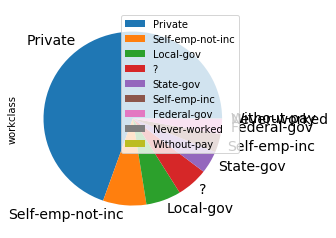

In [79]:
pie('workclass')

Sebagian besar responden bekerja di sektor Private, Self employee no Inc, dan Local Goverment. Di sini terdapat responden yang tidak diketahui work-class nya (adanya yang memiliki tanda '?').

## Education

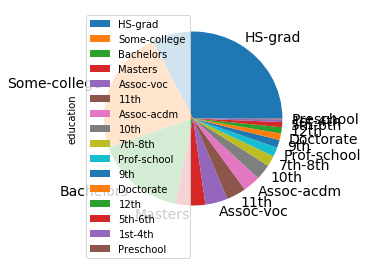

In [80]:
pie('education')

Sebagian besar responden memiliki tingkat pendidikan dengan kategori HS-Grad, Some-college, Bachelors, dan Master.

## Martial-Status

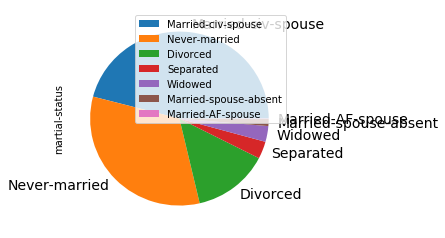

In [81]:
pie('martial-status')

Sebagian besar responden memiliki status pernikahan dengan kategori Married-civ-spouse, Never-married, dan Divorced

## Occupation

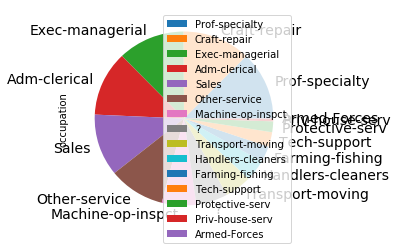

In [82]:
pie('occupation')

Sebagian besar responden memiliki occupation dengan kategori Prof-specialty, Craft-repair, Exec-managenal, Adm-clierical, Sales, Other-service dan Machine-op-inspct. Di sini terdapat responden yang tidak diketahui occupation nya (adanya yang memiliki tanda '?').

## Relationship

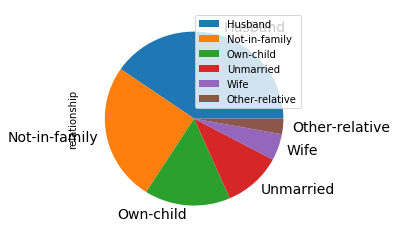

In [83]:
pie('relationship')

Apabila variabel relationship diurutkan dari jumlah yang terbanyak, memiliki urutan kategori Husband, Not-in-family, Own-child, Unmarried, Wife dan Other-relative.

## Race

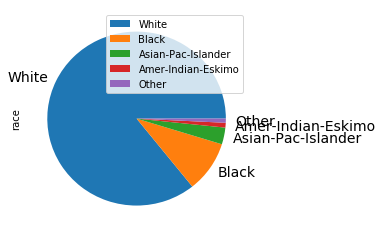

In [84]:
pie('race')

Sebagian besar responden berasal dari ras kulit putih('White'). Sisanya berasal dari ras Black, Asian-Pac-Islander, Amer-Indian-Eskimo dan Other.

## Sex

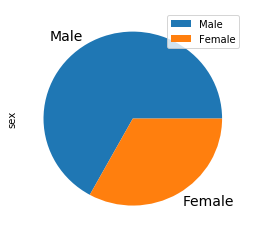

In [85]:
pie('sex')

Sebagian besar responden berjenis kelamin laki laki. Jumlah responden laki laki mendekati dua kali jumlah responden wanita.

## Salary

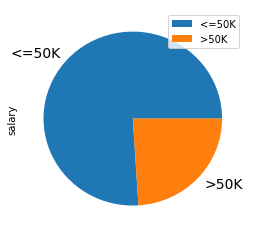

In [86]:
pie('salary')

Sebagian besar responden berada di kelompok berpenghasilan <=50K tiap tahun. Jumlah responden yang berpenghasilan <=50 mendekati tiga kali jumlah responden yang berpenghasilan >50K.

# Korelasi Data Numerik
Pada bagian ini saya akan mengecek seberapa berkorelasi variabel numerik yang ada di dataset ini.

In [31]:
data_salary[['education-num','hours-per-week','age']].corr()

,education-num,hours-per-week,age
education-num,1.000000,0.145752,0.023296
hours-per-week,0.145752,1.000000,0.058430
age,0.023296,0.058430,1.000000


Nilai korelasi antara lama pendidikan dan lama waktu kerja ialah 0.15. Nilai korelasi antara lama pendidikan dan usia ialah 0.02. Nilai korelasi antara lama waktu kerja dan usia ialah 0.06. Nilai korelasi antara ketiga variabel numerik bisa dibilang kecil. Bisa disimpulkan bahwa ketiga variabel numerik saling bebas atau tidak memeliki keterkaitan satu sama lain. Oleh karenanya, kita tidak bisa dilakukan regresi untuk ketiga variabel ini.

# Semua Kategori vs Salary

Dataset kita berjudul 'Data Salary', oleh karenanya saya akan melihat hubungan antara salary dengan variabel kategori yang lain. Untuk data numerik, yang akan dilihat hanya persebaran usia saja, sebab data ini yang perseberannya cukup baik. Sedangkan data kategori akan di uji dengan Uji Chi Square untuk melihat korelasi dua variabel. Untuk mempermudahkan proses, uji chi square program akan diubah menjadi fungsi.

In [32]:
def uji_chi(var_1,var_2):
    tabel = pd.crosstab(data_salary[str(var_1)], data_salary[str(var_2)],
                        margins = True)
    nbar=tabel.shape[0]-1
    nkol=tabel.shape[1]-1
    observed = tabel.iloc[0:nbar,0:nkol] 
    stat_tabel=stats.chi2_contingency(observed= observed)
    # Find the critical value for 95% confidence*
    crit_val = stats.chi2.ppf(q = 0.95, df = stat_tabel[2])
    if stat_tabel[0]<crit_val:
        print("Kedua variabel saling independent (tidak berkorelasi)")
    else:
        print("Kedua variabel dependent (berkorelasi)")

## Age vs Salary

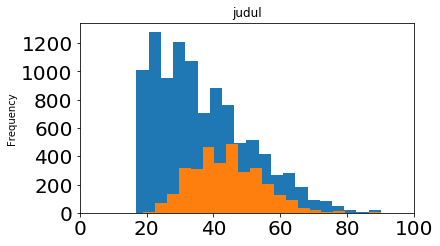

In [87]:
tabel=data_salary['age'].loc[(data_salary['salary']=='<=50K')]
ax=tabel.plot(kind='hist',bins=20, figsize=(6,3.5), fontsize=20)
ax.set_title("judul")
ax.set_xlim(0, 100)
tabel_2=data_salary['age'].loc[(data_salary['salary']=='>50K')]
ax_2=tabel_2.plot(kind='hist',bins=20, figsize=(6,3.5), fontsize=20)
ax_2.set_title("judul")
ax_2.set_xlim(0, 100)
plt.show()

Kelompok yang memiliki penghasilan <=50K lebih banyak berada di rentang umur 20-45 tahun. Sedangkan kelompok yang memiliki penghasilan >50K lebih banyak berada dalam rentang umur 30-50 tahun.

## Workclass vs Salary

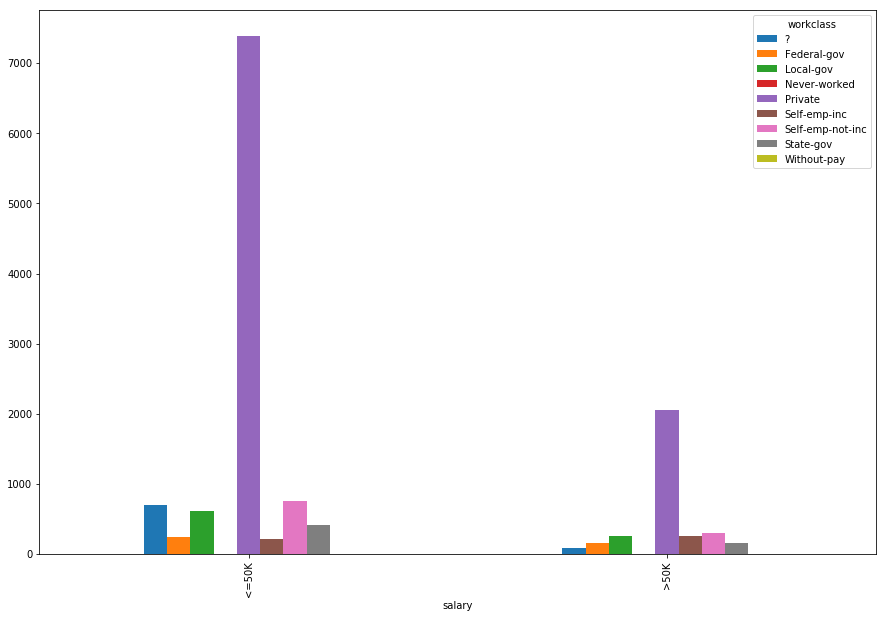

In [35]:
temp2=pd.crosstab(data_salary.salary, data_salary.workclass)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [36]:
uji_chi('salary','workclass')

Kedua variabel dependent (berkorelasi)


Sektor private mendominasi kedua kelompok penghasilan yang ada. Di sini ada juga responden yang tidak diketahui workclass-nya (adanya yang memiliki tanda '?'). Variabel salary dan workclass memiliki keterkaitan satu sama lain.

## Education vs Salary

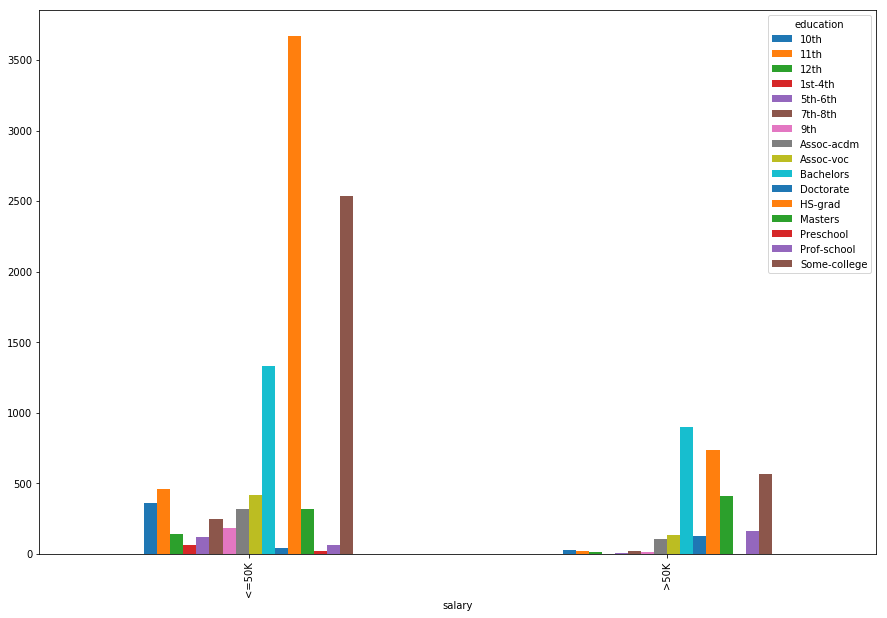

In [37]:
temp2=pd.crosstab(data_salary.salary, data_salary.education)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [38]:
uji_chi('salary','education')

Kedua variabel dependent (berkorelasi)


Pendidikan Bachelors, HS-Grad, Some-college mendominasi di kedua kelompok. Hanya saja dengan urutan yang berbeda. Berdasarkan tingkat pendidikan, sebagian besar tingkatan pendidikan lebih banyak berada di tingkatan penghasilan <=50K. Hanya saja untuk tingkat pendidikan Doctoral, Master, Prof-scholl lebih banyak berpenghasilan >50K. Variabel salary dan education memiliki keterkaitan satu sama lain.

## Martial-Status vs Salary

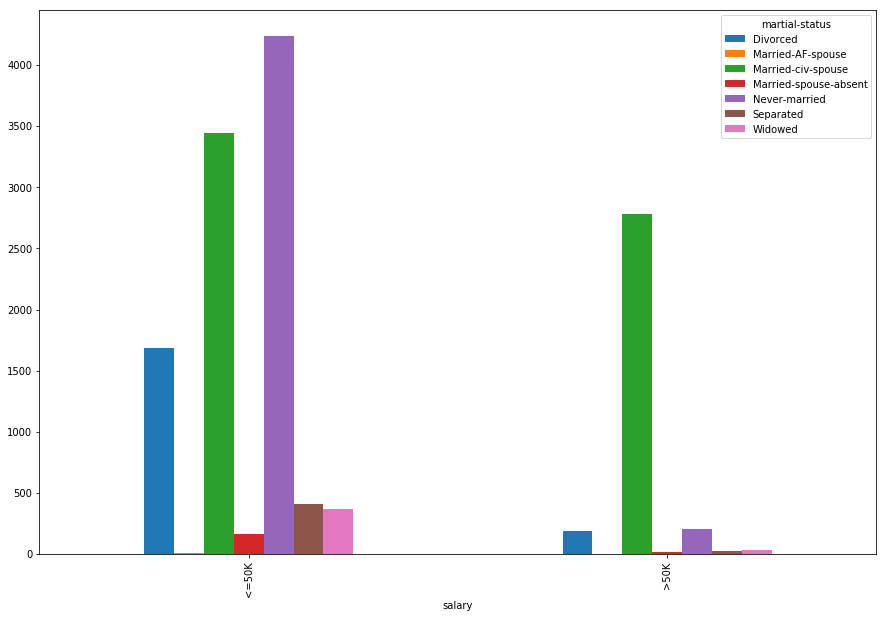

In [40]:
temp2=pd.crosstab(data_salary.salary, data_salary['martial-status'])
temp2.plot.bar(figsize=(15,10), stacked=False)

In [41]:
uji_chi('salary','martial-status')

Kedua variabel dependent (berkorelasi)


Status pernikahan Divorced, Married-civ-spouse, Never-married mendominasi di kedua kelompok. Hanya saja dengan urutan yang berbeda. Ketiga kategori tersebut lebih banyak berada di tingkatan penghasilan <=50K. Hanya saja di kelompok berpenghasilan >50K kategori Married-civ-spouse mendominasi sangat jauh dibandingkan kategori lainnya. Variabel salary dan martial-status memiliki keterkaitan satu sama lain.

##  Occupation vs Salary

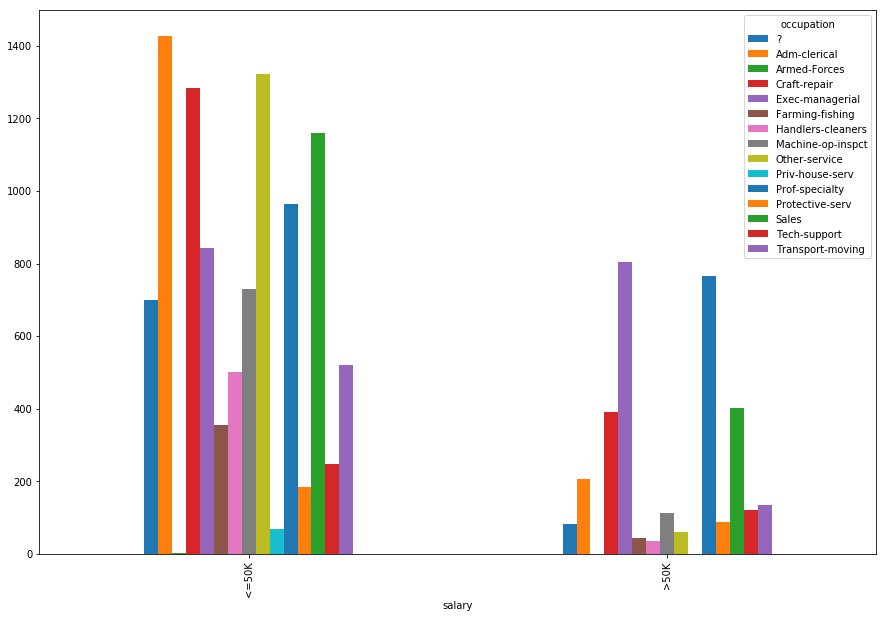

In [42]:
temp2=pd.crosstab(data_salary.salary, data_salary.occupation)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [43]:
uji_chi('salary','occupation')

Kedua variabel dependent (berkorelasi)


Kelompok berpenghasilan <=50K lebih banyak memiliki occupation dengan kategori Adm-cierical, Other-sevice, Craft-repair, Sales, dan Prof-specialty. Di sini ada juga responden yang tidak diketahui occupation-nya (adanya yang memiliki tanda '?'). Sedangkan kelompok berpenghasilan >50K lebih banyak memiliki occupation Exec-managerial, Prof-specialty, dan Sales. Variabel salary dan occupation memiliki keterkaitan satu sama lain.

## Relationship vs Salary

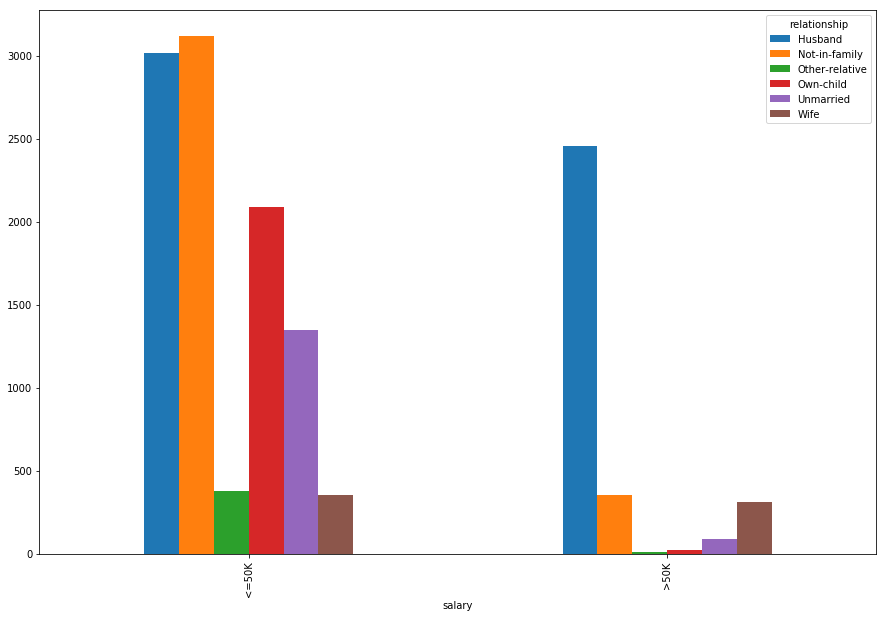

In [44]:
temp2=pd.crosstab(data_salary.salary, data_salary.relationship)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [45]:
uji_chi('salary','relationship')

Kedua variabel dependent (berkorelasi)


Kelompok berpenghasilan <=50K lebih banyak memiliki relationship dengan kategori Husband, Not-in-family, dan Own-Child. Sedangkan kelompok berpenghasilan >50K didominasi oleh kategori Husband. Variabel salary dan relationship memiliki keterkaitan satu sama lain.

## Race vs Salary

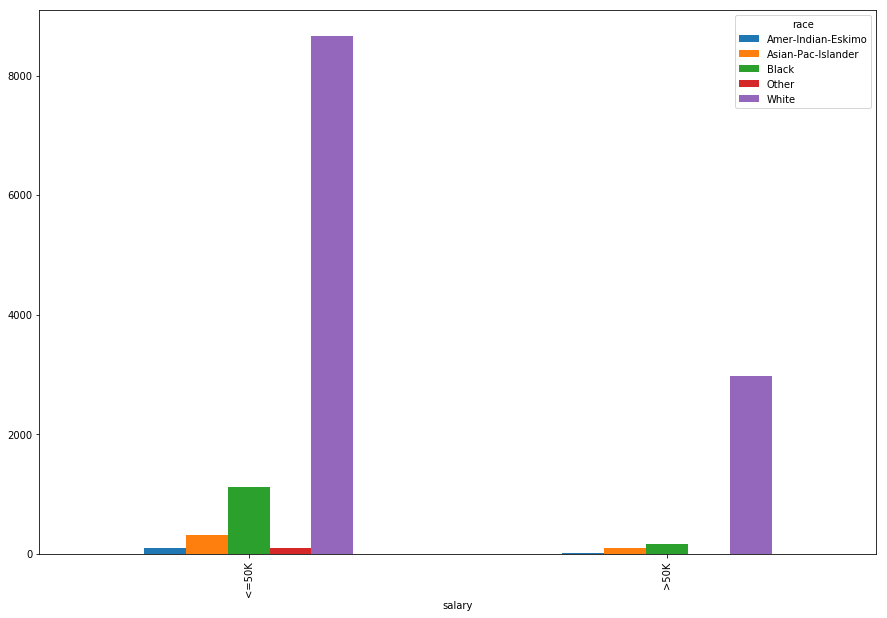

In [46]:
temp2=pd.crosstab(data_salary.salary, data_salary.race)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [47]:
uji_chi('salary','race')

Kedua variabel dependent (berkorelasi)


Di semua ras, kelompok berpenghasilan >50K jumlahnya lebih sedikit dibandingkan kelompok berpenghasilan <=50K. Ras kulit putih (White) mendominasi dua kelompok penghasilan yang ada. Variabel salary dan race memiliki keterkaitan satu sama lain.

## Sex vs Salary

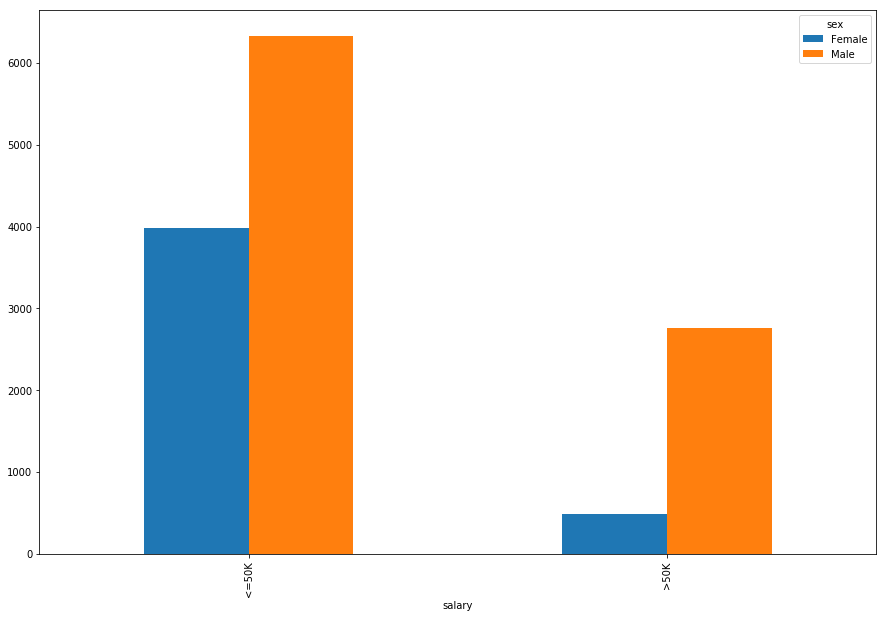

In [48]:
temp2=pd.crosstab(data_salary.salary, data_salary.sex)
temp2.plot.bar(figsize=(15,10), stacked=False)

In [49]:
uji_chi('salary','sex')

Kedua variabel dependent (berkorelasi)


Di semua jenis kelamin, kelompok berpenghasilan >50K jumlahnya lebih sedikit dibandingkan kelompok berpenghasilan <=50K. Laki laki jumlahnya mendominasi dua kelompok penghasilan yang ada. Apabila dicemati, perbandingan jumlah wanita berpenghasilan >50K dengan yang tidak itu amat jauh. Variabel salary dan sex memiliki keterkaitan satu sama lain.

## Native-country vs Salary

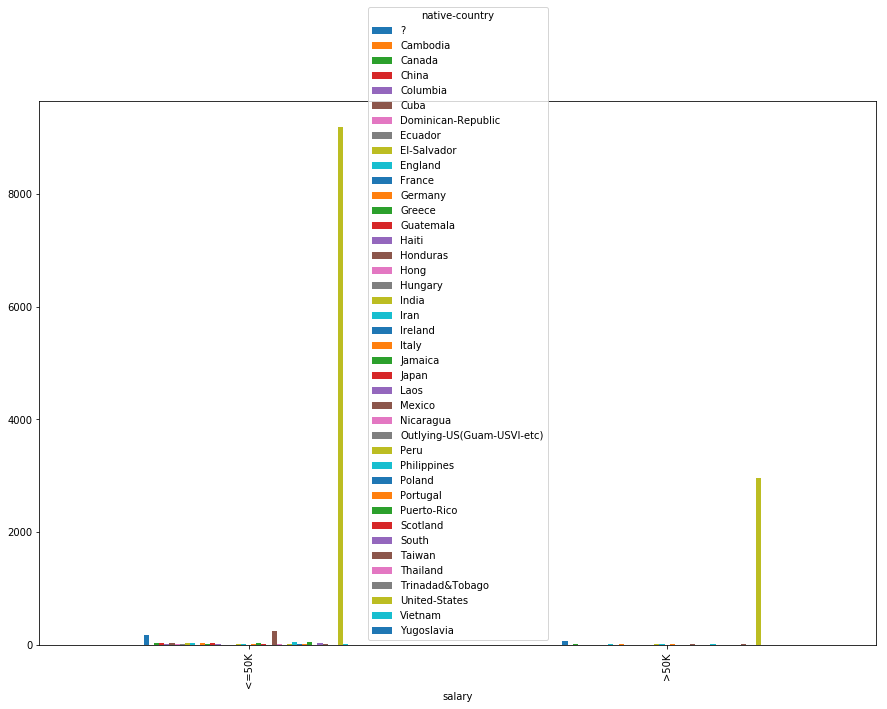

In [50]:
temp2=pd.crosstab(data_salary.salary, data_salary['native-country'])
temp2.plot.bar(figsize=(15,10), stacked=False)

In [51]:
uji_chi('salary','native-country')

Kedua variabel dependent (berkorelasi)


Responden dengan negara asal United-States jumlahnya mendominasi dua kelompok penghasilan yang ada. Di sini ada juga responden yang tidak diketahui dari mana negara asalnya (adanya yang memiliki tanda '?'). Namun, jumlahnya sangat kecil apabila dibandingkan dengan responden bernegara asal US. Variabel salary dan native-country memiliki keterkaitan satu sama lain.

# Kesimpulan

Setelah melakukan eksplorasi data, saya menarik beberapa kesimpulan.

1. Variabel numerik age, education-num, dan hours-per-week tidak memiliki keterkaitan satu sama lain, atau saling bebas (dependent).
2. Semua variabel kategorik memiliki keterkaitan dengan variabel salary.

Sebenarnya untuk pengolahan data lebih lanjut kita bisa menghilangkan data yang tidak diketahui, semisal data '?'. Salah satu opsi yang bisa dilakukan ialah menggantinya dengan data kosong dan di drop. Caranya dengan df.iloc['nama_var'].replace('', np.nan).count(1) dilanjutkan data_salary['nama_var'].dropna().

Inilah akhir dari eksplorasi dataset salary yang saya lakukan. Semoga bermanfaat, maaf apabila ada kekeliruan serta kesalahan yang telah saya lakukan. Semoga dapat memberikan kebermnfaatan untuk kita.